In [1]:
from database import obtain_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Information: Database connection succeeded


### Obtención del Dataset

In [2]:
df = obtain_dataset()
df

,Date,Department,Town,Number_DeathSource1,Number_DeathSource2,Acumulative_DeathSource1,Acumulative_DeathSource2,Population
0,2020-03-15,GUATEMALA,SAN PEDRO SACATEPEQUEZ,1,0,1,0,54623
1,2020-03-15,SACATEPEQUEZ,SAN LUCAS SACATEPEQUEZ,0,0,1,0,28445
2,2020-03-15,GUATEMALA,GUATEMALA,0,0,1,0,1205668
3,2020-03-15,ESCUINTLA,PALIN,0,0,1,0,70118
4,2020-03-15,EL PROGRESO,SAN AGUSTIN ACASAGUASTLAN,0,0,1,0,54588
...,...,...,...,...,...,...,...,...
86604,2020-12-31,QUICHE,SAN BARTOLOME JOCOTENANGO,0,22,5951,4803,15586
86605,2020-12-31,QUETZALTENANGO,SAN MIGUEL SIGÜILA,0,22,5951,4803,9607
86606,2020-12-31,SOLOLA,SAN PABLO LA LAGUNA,0,22,5951,4803,7950
86607,2020-12-31,ALTA VERAPAZ,TAMAHU,0,22,5951,4803,23858


### Información del Dataset

In [3]:
df.head()
df.tail()
df.info()
df.nunique()
(df.isnull().sum()/len(df))*100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86609 entries, 0 to 86608
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      86609 non-null  datetime64[ns]
 1   Department                86609 non-null  object        
 2   Town                      86609 non-null  object        
 3   Number_DeathSource1       86609 non-null  int64         
 4   Number_DeathSource2       86609 non-null  int64         
 5   Acumulative_DeathSource1  86609 non-null  object        
 6   Acumulative_DeathSource2  86609 non-null  int64         
 7   Population                86609 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 5.3+ MB


Date                        0.0
Department                  0.0
Town                        0.0
Number_DeathSource1         0.0
Number_DeathSource2         0.0
Acumulative_DeathSource1    0.0
Acumulative_DeathSource2    0.0
Population                  0.0
dtype: float64

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Acumulative_DeathSource1'] = df['Acumulative_DeathSource1'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86609 entries, 0 to 86608
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      86609 non-null  datetime64[ns]
 1   Department                86609 non-null  object        
 2   Town                      86609 non-null  object        
 3   Number_DeathSource1       86609 non-null  int64         
 4   Number_DeathSource2       86609 non-null  int64         
 5   Acumulative_DeathSource1  86609 non-null  int64         
 6   Acumulative_DeathSource2  86609 non-null  int64         
 7   Population                86609 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 5.3+ MB


### Resumen estadístico

In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,86609,2020-08-24 06:09:48.326848256,2020-03-15 00:00:00,2020-06-22 00:00:00,2020-08-25 00:00:00,2020-10-28 00:00:00,2020-12-31 00:00:00,NaN
Number_DeathSource1,86609.0,0.068711,0.0,0.0,0.0,0.0,27.0,0.55669
Number_DeathSource2,86609.0,18.63035,0.0,7.0,16.0,27.0,61.0,14.440607
Acumulative_DeathSource1,86609.0,3209.7393,1.0,875.0,3878.0,5136.0,5951.0,2118.694661
Acumulative_DeathSource2,86609.0,2260.054475,0.0,514.0,2611.0,3665.0,4803.0,1601.726163
Population,86609.0,49971.442136,2563.0,17465.0,30912.0,58526.0,1205668.0,81461.793846


### Separación de datos

In [6]:
qualitative_data = df.select_dtypes(include=['object', 'datetime64']).columns
quantative_data = df.select_dtypes(include=[np.number]).columns
print(qualitative_data)
print(quantative_data)

Index(['Date', 'Department', 'Town'], dtype='object')
Index(['Number_DeathSource1', 'Number_DeathSource2',
       'Acumulative_DeathSource1', 'Acumulative_DeathSource2', 'Population'],
      dtype='object')


## EDA Monovariable

### Datos cuantitativos

Number_DeathSource1
Skew:  22.08


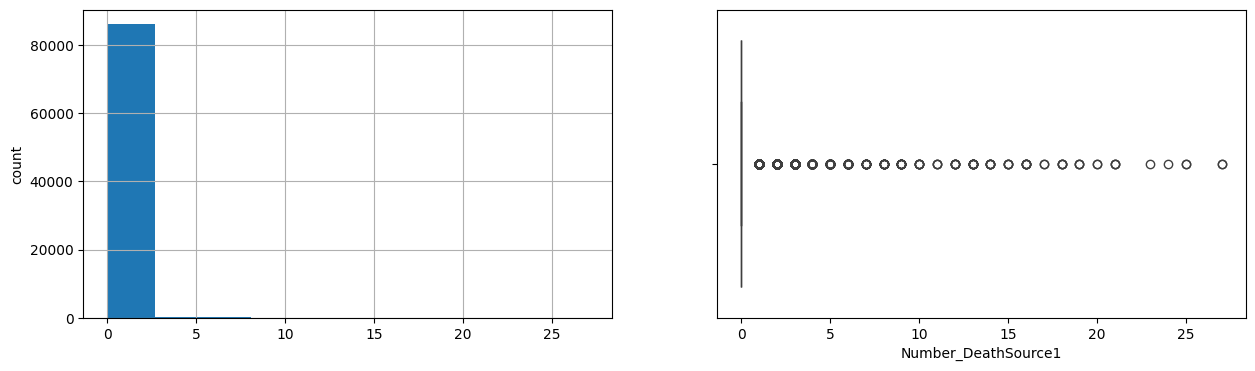

Number_DeathSource2
Skew:  0.78


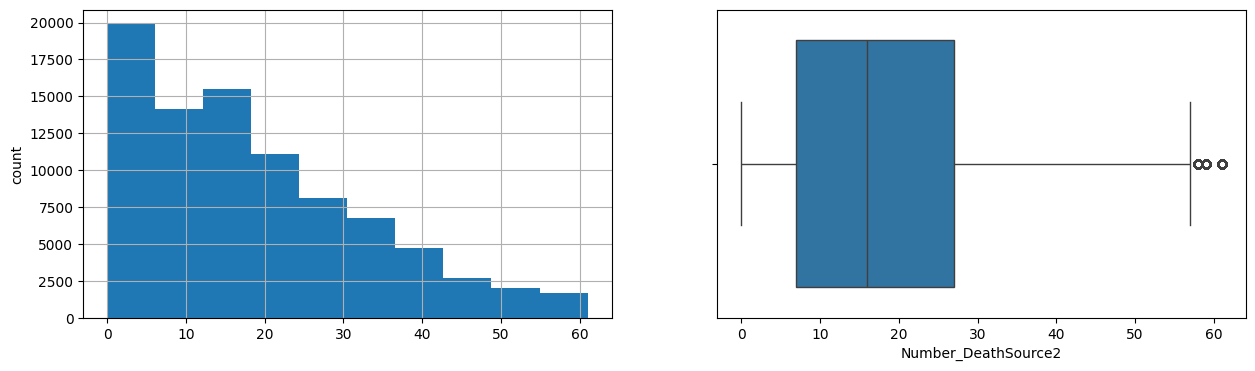

Acumulative_DeathSource1
Skew:  -0.35


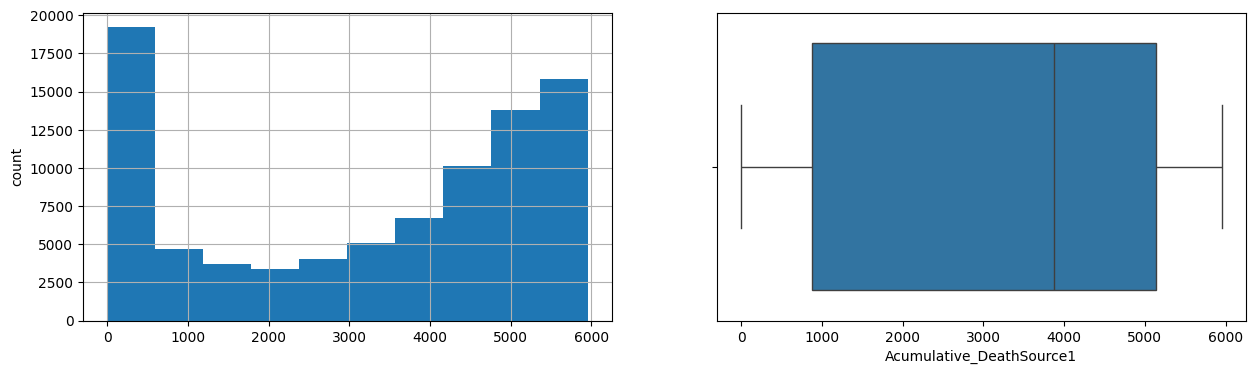

Acumulative_DeathSource2
Skew:  -0.14


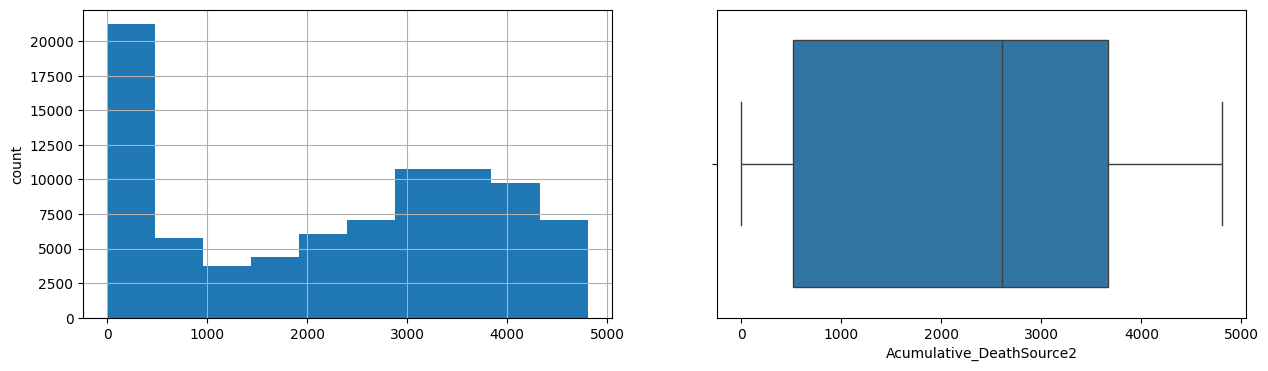

Population
Skew:  9.55


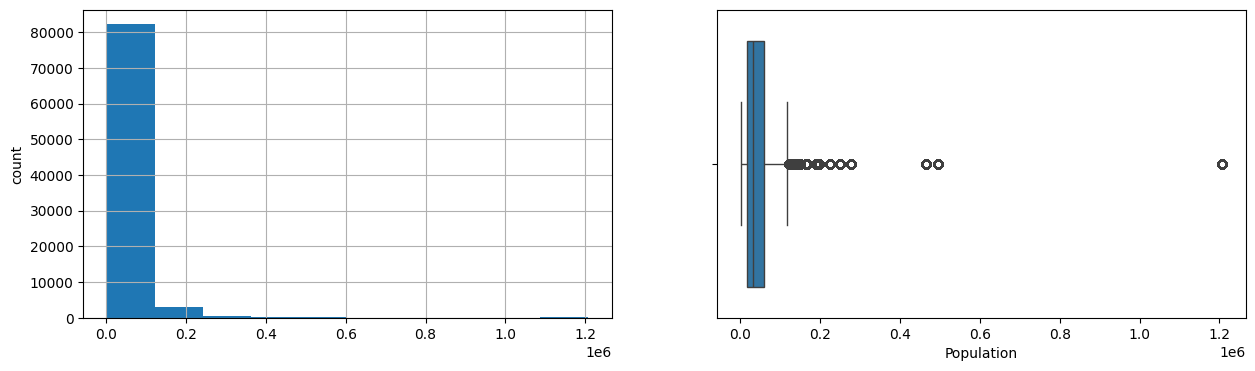

In [7]:
for col in quantative_data:
    print(col)
    print('Skew: ', round(df[col].skew(),2))
    plt.figure(figsize=(15,4))

    plt.subplot(1,2,1)
    df[col].hist()
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

### Datos cualitativos

[Text(0, 0, 'SAN PEDRO SACATEPEQUEZ'),
 Text(2, 0, 'LA DEMOCRACIA'),
 Text(4, 0, 'SAN LORENZO'),
 Text(6, 0, 'SANTA ANA'),
 Text(8, 0, 'SANTA LUCIA LA REFORMA'),
 Text(10, 0, 'COMAPA'),
 Text(12, 0, 'IPALA'),
 Text(14, 0, 'SAN JUAN COMALAPA'),
 Text(16, 0, 'SAN MIGUEL CHICAJ'),
 Text(18, 0, 'POCHUTA'),
 Text(20, 0, 'ESQUIPULAS PALO GORDO'),
 Text(22, 0, 'EL ESTOR'),
 Text(24, 0, 'SAN LUIS'),
 Text(26, 0, 'TUCURU'),
 Text(28, 0, 'SAN MIGUEL ACATAN'),
 Text(30, 0, 'NEBAJ'),
 Text(32, 0, 'SAN JERONIMO'),
 Text(34, 0, 'LANQUIN'),
 Text(36, 0, 'SANTA CLARA LA LAGUNA'),
 Text(38, 0, 'SAN RAFAEL LA INDEPENDENCIA'),
 Text(40, 0, 'NAHUALA'),
 Text(42, 0, 'SAN JORGE'),
 Text(44, 0, 'RAXRUHA'),
 Text(46, 0, 'GENOVA'),
 Text(48, 0, 'GUANAGAZAPA'),
 Text(50, 0, 'CABRICAN'),
 Text(52, 0, 'PATZICIA'),
 Text(54, 0, 'USUMATLAN'),
 Text(56, 0, 'COLOTENANGO'),
 Text(58, 0, 'YEPOCAPA'),
 Text(60, 0, 'SAYAXCHE'),
 Text(62, 0, 'NENTON'),
 Text(64, 0, 'EL RODEO'),
 Text(66, 0, 'SAN LUCAS TOLIMAN'),
 Text(68,

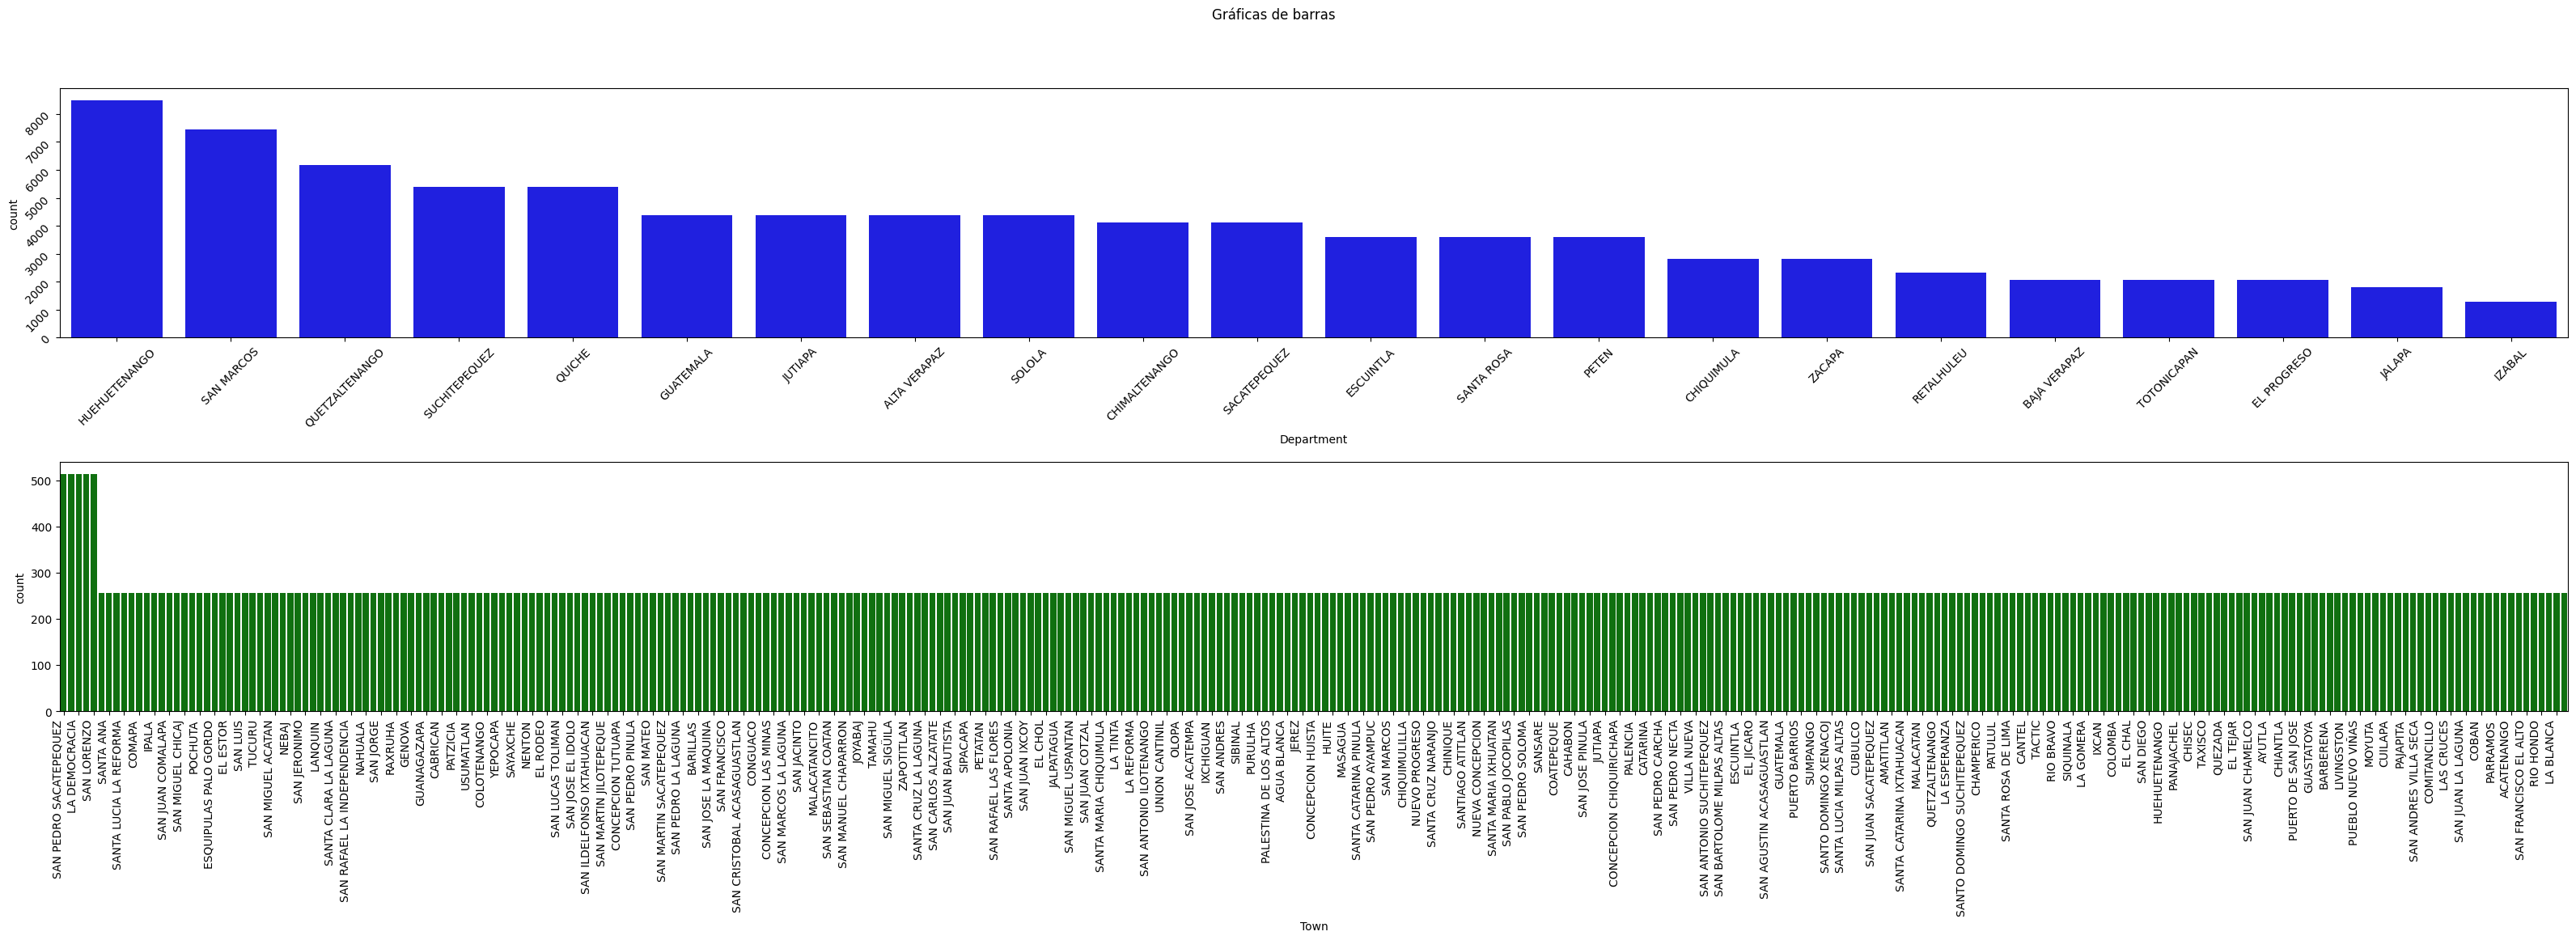

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(40, 10))
fig.suptitle('Gráficas de barras')

sns.countplot(ax=axes[0], x='Department', data=df, color='blue', order=df['Department'].value_counts().index)
sns.countplot(ax=axes[1], x='Town', data=df, color='green', order=df['Town'].value_counts().index, linewidth=1)

axes[0].tick_params(labelrotation=45)
plt.subplots_adjust(hspace=0.5)

ticks = axes[1].get_xticks()
tick_labels = axes[1].get_xticklabels()
step = max(1, len(ticks) // 160)
axes[1].set_xticks(ticks[::step])
axes[1].set_xticklabels(tick_labels[::step], rotation=90, ha='right')


## EDA Multivariable

### Datos cuantitativos

<Figure size 1500x1700 with 0 Axes>

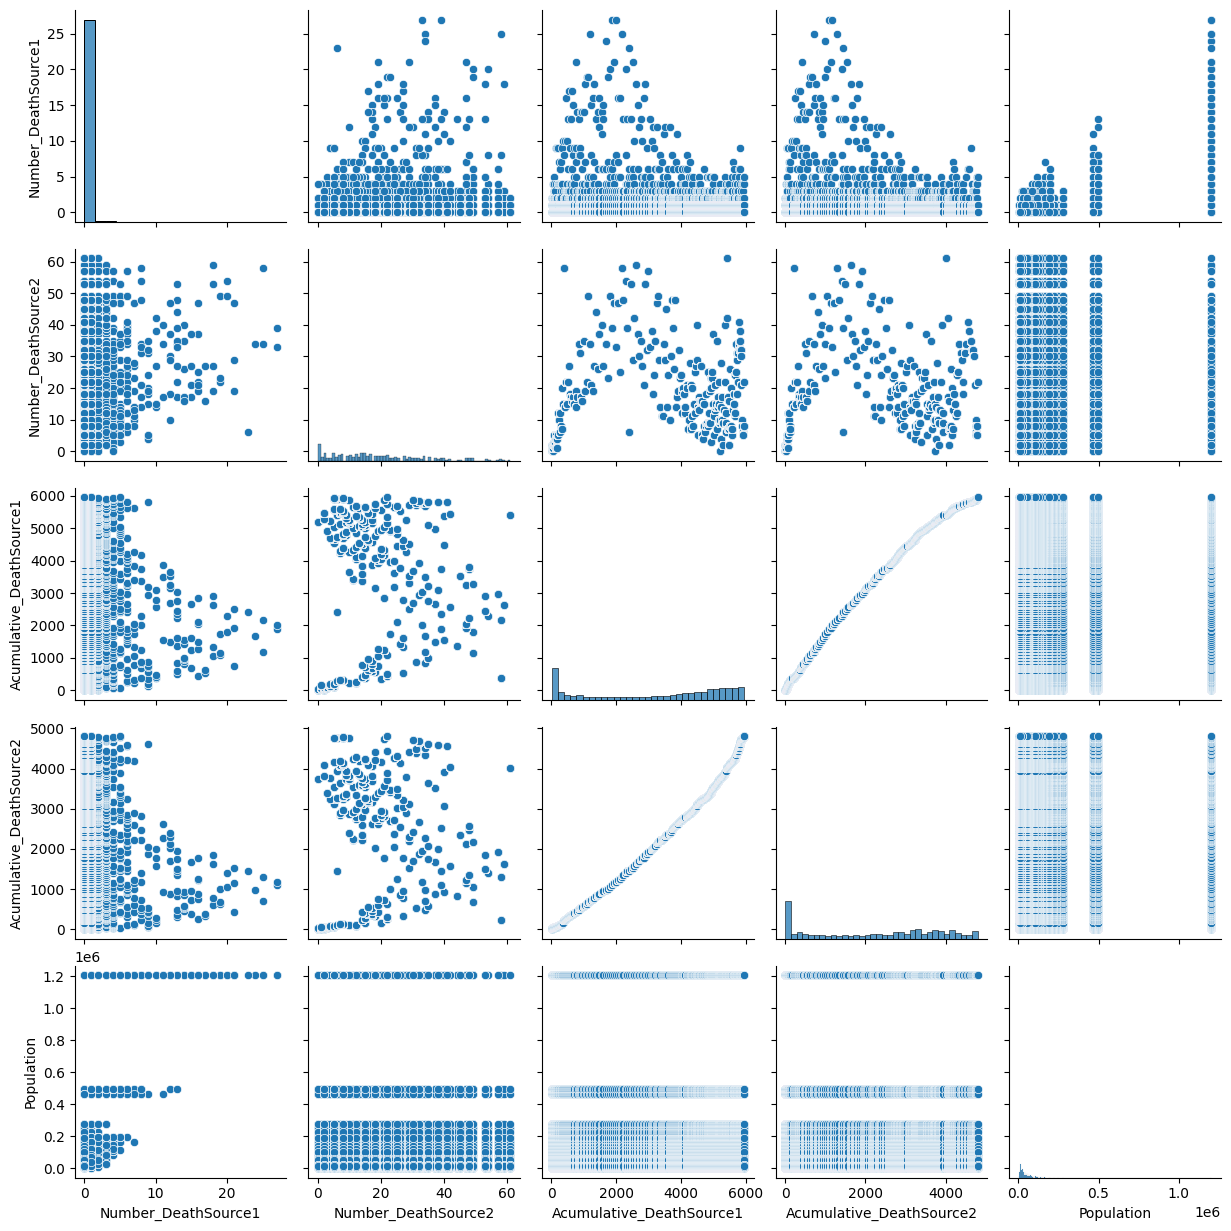

In [56]:
plt.figure(figsize=(15,17))
sns.pairplot(data=df)
plt.show()

### Datos cualitativos

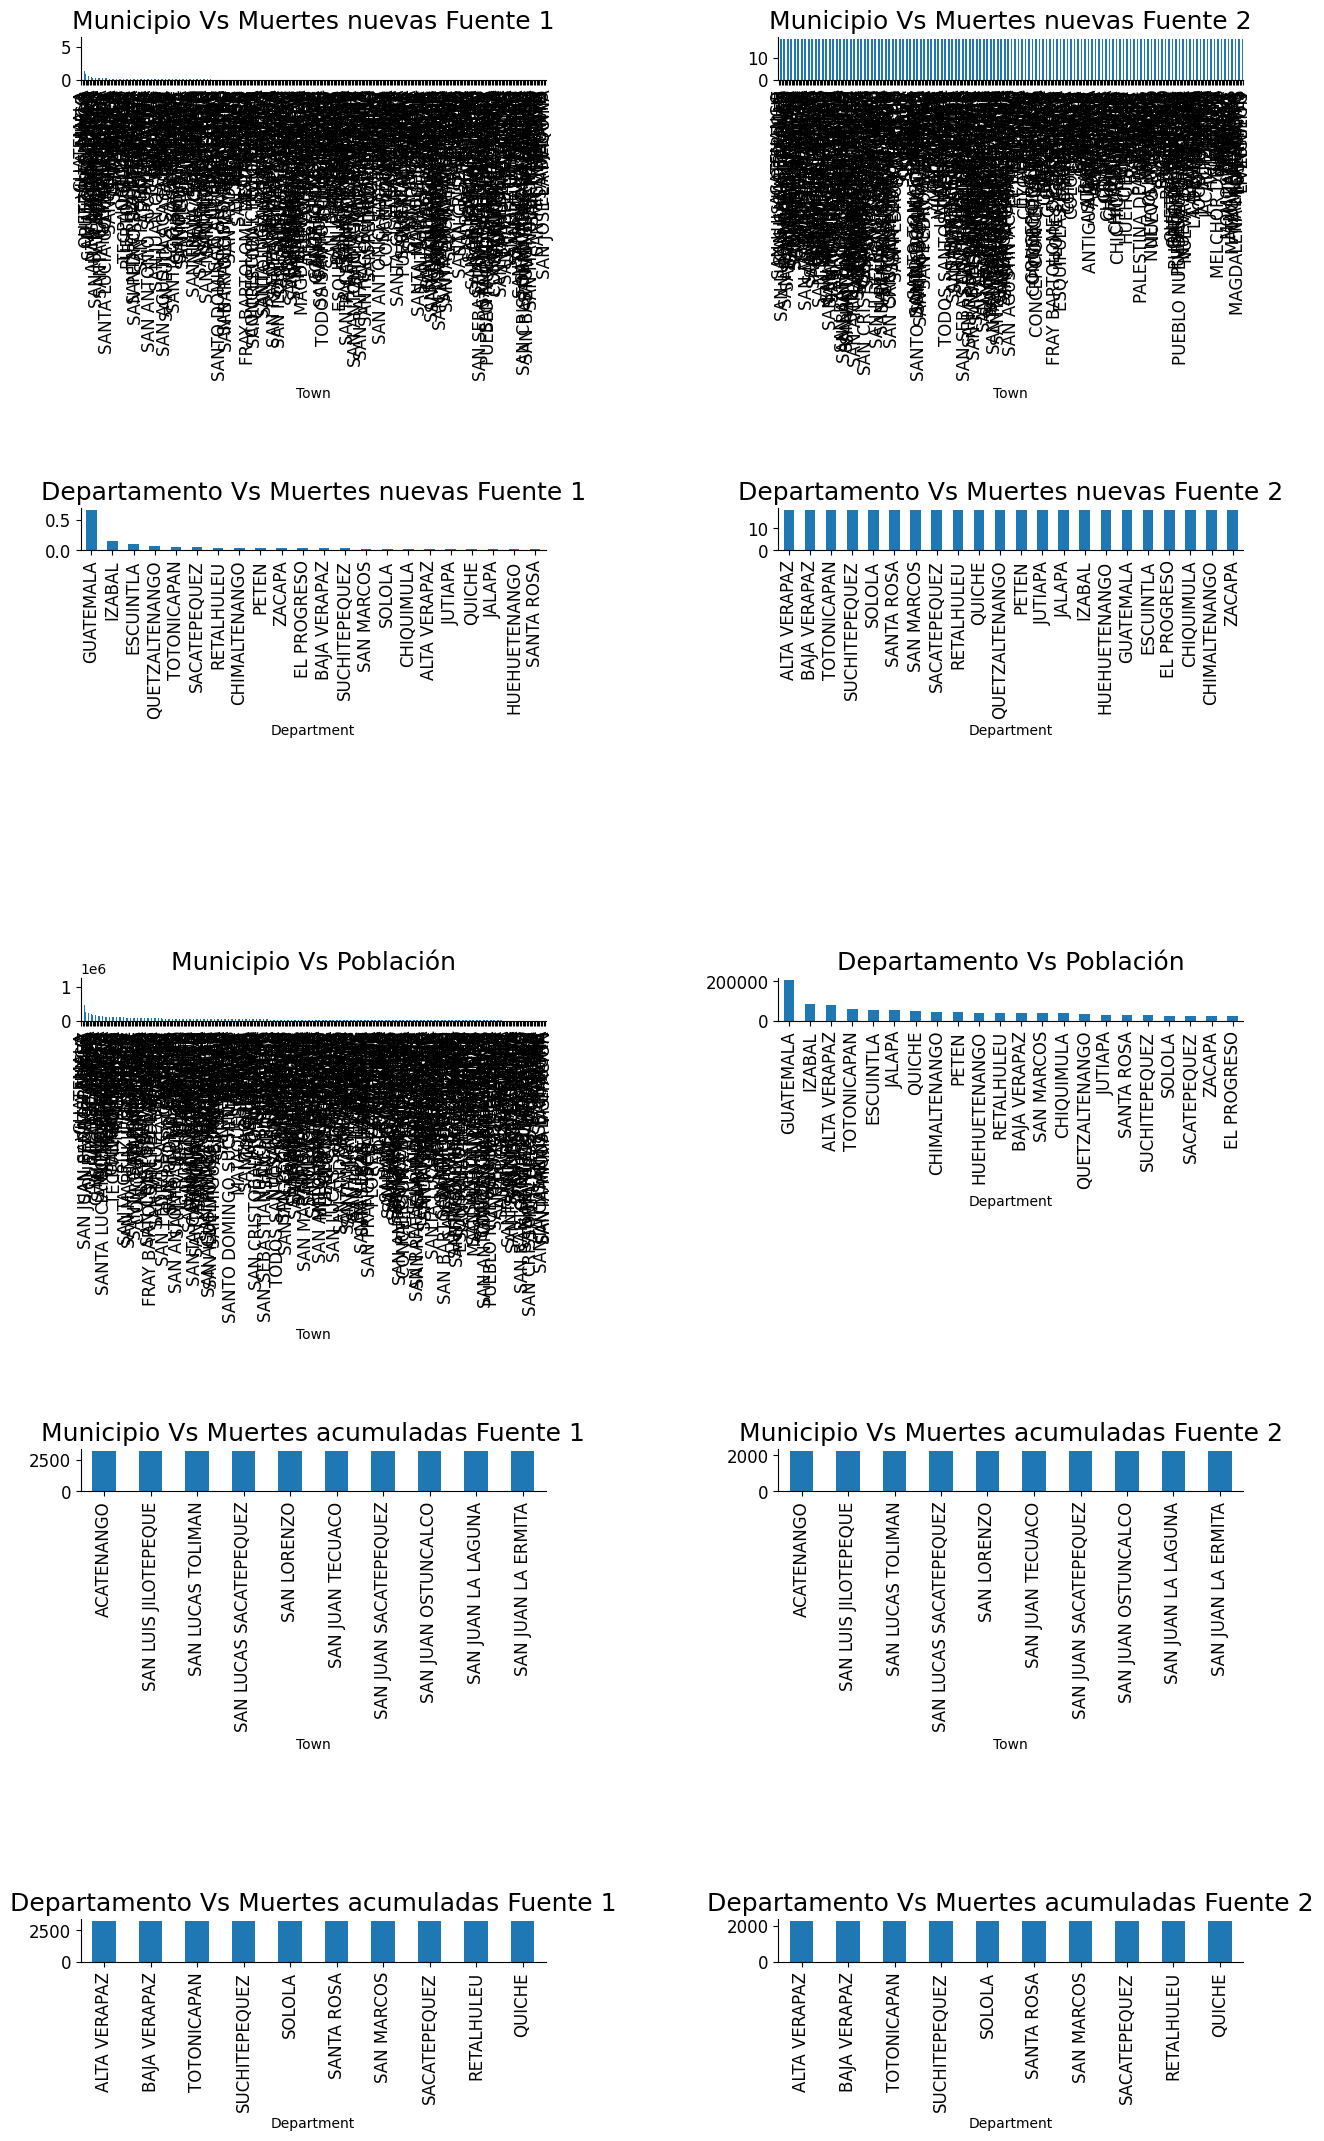

In [72]:
fig, axarr = plt.subplots(5, 2, figsize=(15, 25))

df.groupby('Town')['Number_DeathSource1'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Municipio Vs Muertes nuevas Fuente 1", fontsize=18)

df.groupby('Town')['Number_DeathSource2'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Municipio Vs Muertes nuevas Fuente 2", fontsize=18)

df.groupby('Department')['Number_DeathSource1'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Departamento Vs Muertes nuevas Fuente 1", fontsize=18)

df.groupby('Department')['Number_DeathSource2'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Departamento Vs Muertes nuevas Fuente 2", fontsize=18)

df.groupby('Town')['Population'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Municipio Vs Población", fontsize=18)

df.groupby('Department')['Population'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Departamento Vs Población", fontsize=18)

df.groupby('Town')['Acumulative_DeathSource1'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Municipio Vs Muertes acumuladas Fuente 1", fontsize=18)

df.groupby('Town')['Acumulative_DeathSource2'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Municipio Vs Muertes acumuladas Fuente 2", fontsize=18)

df.groupby('Department')['Acumulative_DeathSource1'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[4][0], fontsize=12)
axarr[4][0].set_title("Departamento Vs Muertes acumuladas Fuente 1", fontsize=18)

df.groupby('Department')['Acumulative_DeathSource2'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[4][1], fontsize=12)
axarr[4][1].set_title("Departamento Vs Muertes acumuladas Fuente 2", fontsize=18)

plt.subplots_adjust(hspace=10)
plt.subplots_adjust(wspace=.5)
sns.despine()